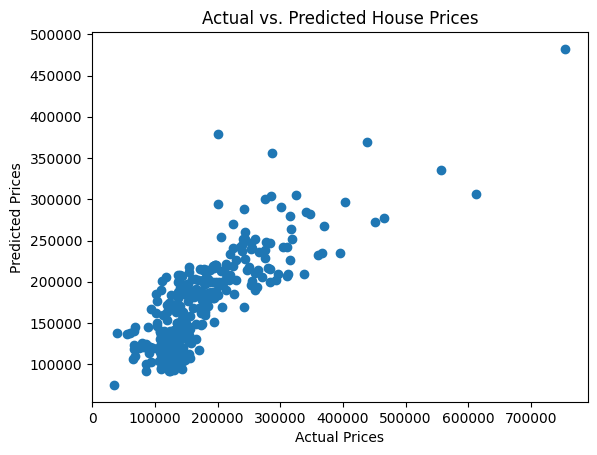

,HouseID,Predicted Price
0,1461,121423.030985
1,1462,143380.870622
2,1463,204748.668874
3,1464,202205.354725
4,1465,191336.364775
...,...,...
1454,2915,119270.252496
1455,2916,119270.252496
1456,2917,101383.283260
1457,2918,102247.226188


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

def LinearRegression_model(trainer, tester, result_path):
    data = pd.read_csv(trainer)

    # relevant features
    features = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath', 'SalePrice']
    data = data[features]

    # drop rows with missing values
    data.dropna(inplace=True)

    # split features and target variable
    X = data.drop('SalePrice', axis=1)
    y = data['SalePrice']

    # perform feature scaling
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # model training
    model = LinearRegression()
    model.fit(X_train, y_train)

    # make predictions
    test = pd.read_csv(tester)
    test_features = test[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath']]
    test_features_scaled = scaler.transform(test_features)
    predictions = model.predict(test_features_scaled)

    # create DataFrame with predictions
    result = pd.DataFrame({'HouseID': test['Id'], 'Predicted Price': predictions})

    # visualize actual vs. predicted house prices
    plt.scatter(y_test, model.predict(X_test))
    plt.xlabel("Actual Prices")
    plt.ylabel("Predicted Prices")
    plt.title("Actual vs. Predicted House Prices")
    plt.show()

    return result

result = LinearRegression_model('train.csv', 'test.csv', 'result.csv')
(result)
